# Attribute Importance for Concept Drift - Primary and Secondary Drift Detection in one dataset

This notebook allows to detect primary and related secondary driftpoints according to the master thesis' framework.

The user specifies a file path for the dataset to analyze and builds the primary as well as secondary drift detectors.

Outputs are graphs as well as drift point lists.

## Setup
### Imports

In [1]:
# imports
import helper
from pm4py.objects.log.importer.xes import importer as xes_importer

from processdrift.framework import drift_detection
from processdrift.framework import drift_explanation
from processdrift.framework import feature_extraction
from processdrift.framework import pop_comparison
from processdrift.framework import windowing

### Data settings and event log loading

In [2]:
# data settings
data_file_path = 'data\\synthetic\\attribute_drift_simple\\simple_1a869207-4579-420b-bd9c-8c8e2fc049a2.xes'

# load event log
data_info = helper.get_data_information(data_file_path)
event_log = xes_importer.apply(data_file_path)

c:\Users\Lennart\Tools\Anaconda3\envs\concept_drift\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 7500/7500 [00:10<00:00, 737.61it/s] 


### Configure Primary Drift Detector

In [3]:
# alternative 1: ProDrift Drift detector
primary_process_drift_detector = drift_detection.DriftDetectorProDrift(path_to_prodrift='ProDrift2.5/ProDrift2.5.jar',
                                                                        drift_detection_mechanism='runs',
                                                                        window_size=150,
                                                                        window_mode='adaptive',
                                                                        detect_gradual_as_well='False')

In [4]:
# alternative 2: Configure custom drift detector
# the user can select 
# - a primary feature extractor, specifying which primary axis feature to use
# - a window generator (fixed size or adaptive) incl. the window sizes and further settings
# - a population comparer
# - a threshold for detecting the change points

# primary_feature_extractor = feature_extraction.RelationshipTypesCountFeatureExtractor('Relationship types count')
# primary_window_generator = windowing.FixedSizeWindowGenerator(window_size=150, slide_by=1)
# primary_population_comparer = pop_comparison.HotellingsTSquaredPopComparer()
# primary_threshold = 0.5
# primary_process_drift_detector = drift_detection.DriftDetector(primary_feature_extractor, 
#                                                                primary_window_generator,
#                                                                primary_population_comparer, 
#                                                                threshold=primary_threshold)

### Configure Secondary Drift Detectors

The user can specify a list of secondary drift detectors.

In [5]:
secondary_window_generator = windowing.AdaptiveWindowGenerator(initial_window_size=100)
secondary_population_comparer = pop_comparison.HellingerDistanceComparer()
secondary_threshold = 0.6
secondary_exclude_attributes = ['concept:name']
secondary_drift_detectors = drift_detection.get_all_attribute_drift_detectors(event_log,
                                                                         secondary_window_generator, 
                                                                         secondary_population_comparer, 
                                                                         threshold=secondary_threshold,
                                                                         exclude_attributes=secondary_exclude_attributes)

## Run the Change Point Explainer

In [6]:
# create the change point explainer
drift_explainer = drift_explanation.DriftExplainer(primary_process_drift_detector, secondary_drift_detectors)

# get the change point explanations
primary_and_secondary_change_series = drift_explainer.get_primary_and_secondary_change_series(event_log)

exporting log, completed traces :: 100%|██████████| 7500/7500 [00:07<00:00, 946.26it/s] 


java -jar "ProDrift2.5/ProDrift2.5.jar" -fp "C:\Users\Lennart\AppData\Local\Temp\tmpnhksycr4\event_log.xes" -ddm runs -ws 150 -gradual
b'event_log.xes\r\nruns\r\nInitial window size = 150\r\nWindow type = ADWIN\r\n*********************************************\r\n\r\n(1) Sudden drift detected at trace: 850 (Fri Mar 16 16:55:50 CET 2638) after reading 942 traces.\r\n\r\n\r\n(2) Sudden drift detected at trace: 1653 (Wed Mar 29 14:56:16 CEST 2767) after reading 1753 traces.\r\n\r\n\r\n(3) Sudden drift detected at trace: 2309 (Sat Mar 12 12:51:13 CET 3272) after reading 2409 traces.\r\n\r\n\r\n(4) Sudden drift detected at trace: 3106 (Fri Mar 27 12:03:11 CET 3361) after reading 3196 traces.\r\n\r\n\r\n(5) Sudden drift detected at trace: 3821 (Tue Mar 13 09:42:44 CET 3906) after reading 3913 traces.\r\n\r\n\r\n(6) Sudden drift detected at trace: 4649 (Tue Feb 25 09:33:46 CET 4031) after reading 4746 traces.\r\n\r\n\r\n(7) Sudden drift detected at trace: 5336 (Wed Mar 16 09:34:30 CET 4540) af

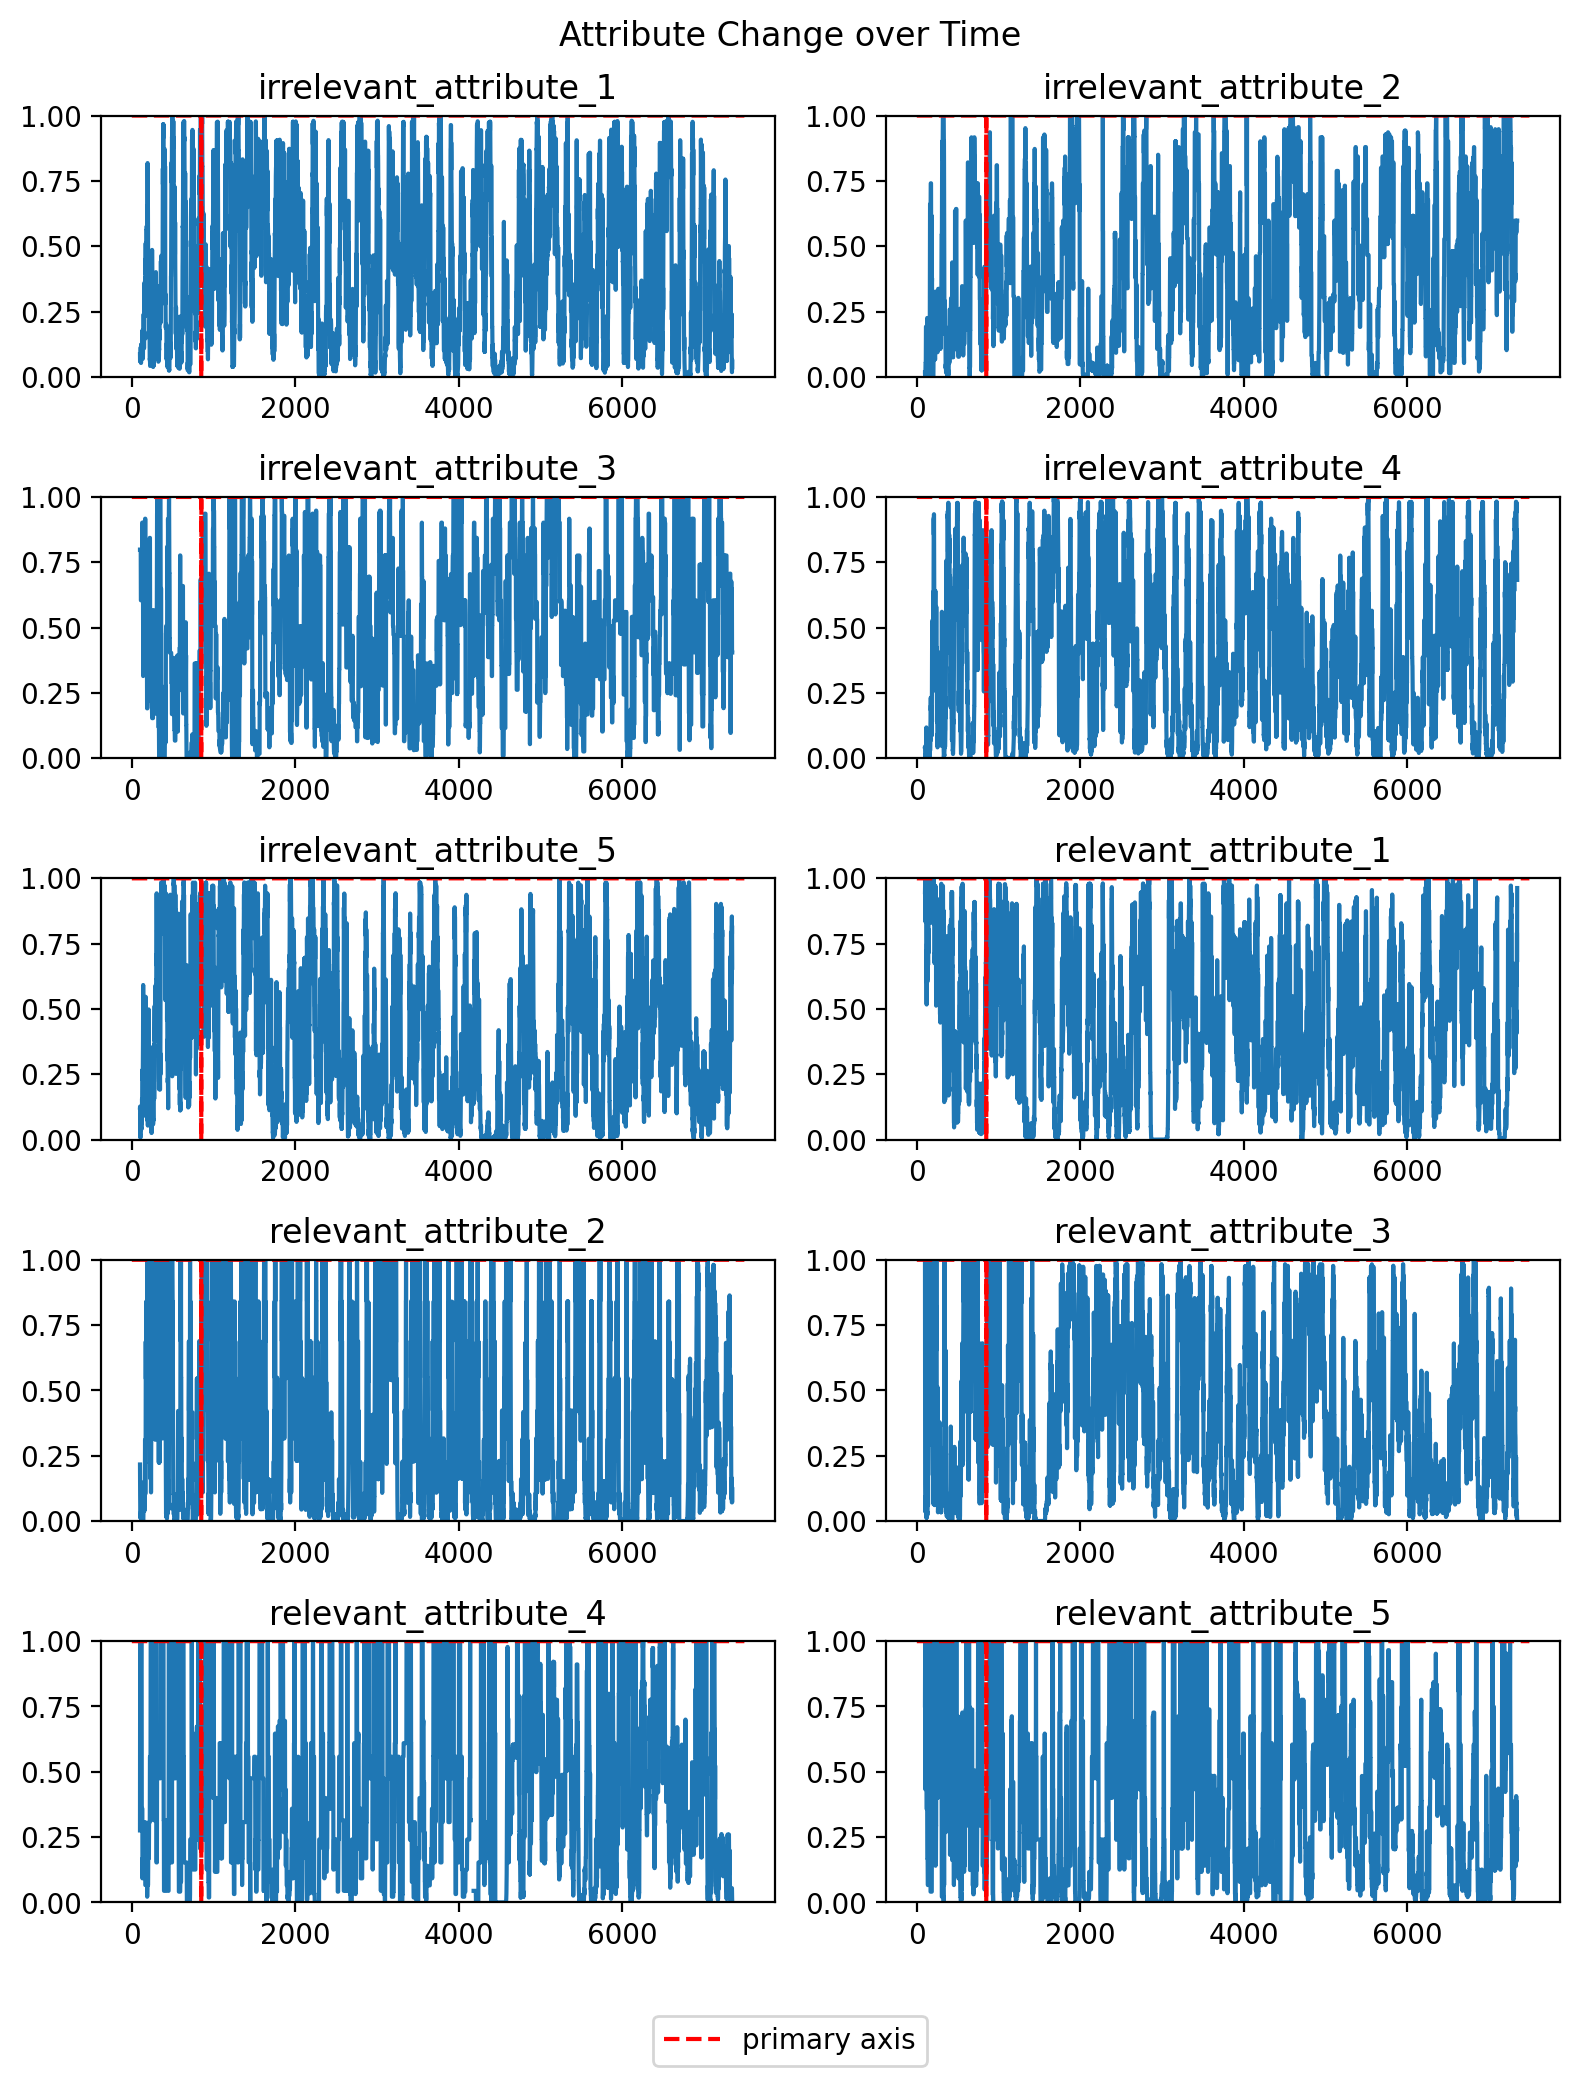

<module 'matplotlib.pyplot' from 'c:\\Users\\Lennart\\Tools\\Anaconda3\\envs\\concept_drift\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [7]:
# plot the change point explanations
drift_explanation.plot_primary_and_secondary_change_series(primary_and_secondary_change_series)

In [8]:
# get the list of change points (primary and secondary) incl. lag
